# Weather and Motor Vehicle Collisions Frequency

In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
from dateutil.rrule import rrule, DAILY
from __future__ import division
import geoplotlib as glp
from geoplotlib.utils import BoundingBox, DataAccessObject

pd.set_option('display.max_columns', None)
%matplotlib inline  

In [2]:
# Read and filter weather data
weather = pd.read_csv('datasets/weather_data_nyc_kjfk_clean2.csv')
incidents = pd.read_csv("datasets/NYPD_Motor_Vehicle_Collisions_weather4.csv")
weather['date'] = weather.Year.astype('str') +'/'+ weather.Month.astype('str') \
                  +'/'+ weather.Day.astype('str') +'/'+ weather.Hour.astype('str')

/Users/masve/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/masve/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*** Frequency of measured weather conditions from 7/1/2012 to 3/1/2016, on hourly basis ***

In [3]:
# Initialize condition dictionary
conditions = list(weather.Conditions.unique())
condic = {}
for cond in conditions:
    condic[cond] = 0;

# Fill condic with every occurrence of incident in given weather condition
for d in weather.date.unique():
    condi = weather[weather.date == d]['Conditions'].iloc[0]
    condic[condi] += 1

condic

{'Blowing Snow': 3,
 'Clear': 2142,
 'Fog': 212,
 'Haze': 107,
 'Heavy Rain': 96,
 'Heavy Snow': 11,
 'Heavy Thunderstorms and Rain': 18,
 'Ice Pellets': 2,
 'Light Drizzle': 291,
 'Light Freezing Drizzle': 8,
 'Light Freezing Rain': 41,
 'Light Ice Pellets': 11,
 'Light Rain': 1759,
 'Light Rain Showers': 1,
 'Light Snow': 569,
 'Light Thunderstorms and Rain': 49,
 'Mist': 15,
 'Mostly Cloudy': 10366,
 'Overcast': 5823,
 'Partly Cloudy': 4102,
 'Patches of Fog': 7,
 'Rain': 295,
 'Scattered Clouds': 6060,
 'Shallow Fog': 9,
 'Snow': 33,
 'Squalls': 2,
 'Thunderstorm': 27,
 'Thunderstorms and Rain': 15,
 'Thunderstorms with Small Hail': 1,
 'Unknown': 7}

In [4]:
# Get frequency of collision per hour of specific weather condition
conditionCount = {}
for c in incidents.Conditions.unique():
    if (pd.notnull(c)):
        mask = ((incidents.Conditions == c))
        filtered_incidents = incidents[mask]
        conditionCount[c] = filtered_incidents.size
    
conditionCount

{'Blowing Snow': 884,
 'Clear': 1043732,
 'Fog': 116518,
 'Haze': 112200,
 'Heavy Rain': 82246,
 'Heavy Snow': 5644,
 'Heavy Thunderstorms and Rain': 21522,
 'Ice Pellets': 1496,
 'Light Drizzle': 229636,
 'Light Freezing Drizzle': 4760,
 'Light Freezing Rain': 30770,
 'Light Ice Pellets': 13090,
 'Light Rain': 1548632,
 'Light Rain Showers': 1326,
 'Light Snow': 479026,
 'Light Thunderstorms and Rain': 52258,
 'Mist': 9826,
 'Mostly Cloudy': 8756700,
 'Overcast': 3677100,
 'Partly Cloudy': 2912236,
 'Patches of Fog': 2346,
 'Rain': 267410,
 'Scattered Clouds': 5272788,
 'Shallow Fog': 3366,
 'Snow': 45628,
 'Squalls': 1564,
 'Thunderstorm': 29104,
 'Thunderstorms and Rain': 8670,
 'Thunderstorms with Small Hail': 1190,
 'Unknown': 6834}

In [5]:
# Calculate ratios
ratios = {}

for k,v in conditionCount.iteritems():
    conditionCountValue = conditionCount[k]
    weatherConditionCountValue = condic[k]
    ratio =  conditionCountValue / weatherConditionCountValue
    ratios[k] = ratio
    #print "%s: %s" % (k, ratio)

# Normalize on Mostly Cloudy (Most common weather condition)
# reference = ratios["Mostly Cloudy"]
# for k in ratios:
#     ratios[k] = (ratios[k]/reference)*100

# ratios

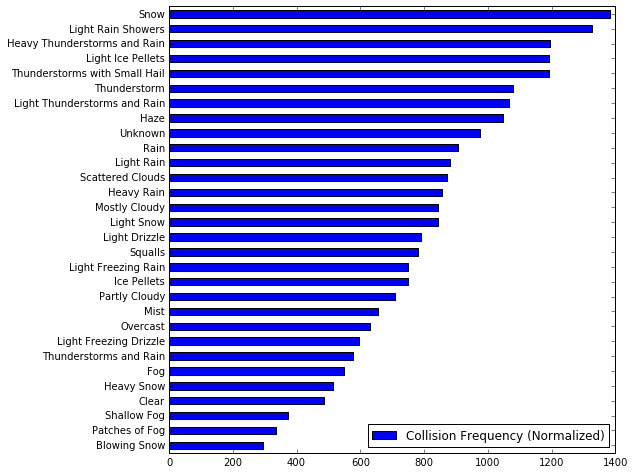

In [6]:
# Plot ratios
df = pd.DataFrame(pd.Series(ratios, name="Collision Frequency (Normalized)").sort_values())
df.plot(kind='barh', figsize=(8,8))

In [7]:
# Export to json for d3 viz
from collections import OrderedDict
import json
with open('datasets/freq_weather2.json', 'w') as fp:
    json.dump(OrderedDict(sorted(ratios.items(), key=lambda x: x[1], reverse=True)), fp)